# Lab | Customer Analysis Round

For this lab, we still keep using the `marketing_customer_analysis.csv` file that you can find in the previous lab's `Data` folder.

### Get the data

We are using the `marketing_customer_analysis.csv` file.

### Processing Data - Numerical

(_Further processing..._)

- Plot the distribution of the different numerical values

- Check and deal with `null` values
- Check and deal with outliers. (Probar con rango iq en 1,5, 3, 0.9)

- Normalize columns:

- Conduct Linear Regressions
  - Using Statsmodels
  - Using sklearn
  - Interpret results  
  - Compare with previous lab

  
Now, repeat Linear Regressions but standarizing columns instead of normalizing and check for differences

# Importamos las librerias

In [1]:
# manejo bbdd
import pandas as pd
import numpy as np
import datetime

#gráficas
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#estadística
import math
from scipy.stats import norm
from scipy import stats #para box-cox entre otros
from scipy.stats import skew

#preprocesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#modelos y evaluación
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm
from statsmodels.formula.api import ols

### Get the data

We are using the `marketing_customer_analysis.csv` file.

In [2]:
data = pd.read_csv("/Users/davidmartinfernandez/Desktop/Ironhack/Bootcamp/LABS/UNIT_7/lab-ML-2/Data/marketing_customer_analysis.csv")
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [3]:
data.tail()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large
9133,Y167826,California,2611.836866,No,Extended,College,2/14/11,Unemployed,M,0,...,90,0,1,Corporate Auto,Corporate L3,Offer4,Call Center,369.600000,Two-Door Car,Medsize


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [3]:
#Voy a realizar las buenas practicas y poner las columnas en minúscula y substituir los espacios por "_".
stand_col = []
for i in range(len(data.columns)):
    stand_col.append(data.columns[i].lower().replace(' ','_'))
data.columns = stand_col

In [4]:
data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


### Processing Data - Numerical

In [5]:
#nos quedamos con las numericas
numericals = data.select_dtypes(np.number)
numericals.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [6]:
numericals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly_premium_auto           9134 non-null   int64  
 3   months_since_last_claim        9134 non-null   int64  
 4   months_since_policy_inception  9134 non-null   int64  
 5   number_of_open_complaints      9134 non-null   int64  
 6   number_of_policies             9134 non-null   int64  
 7   total_claim_amount             9134 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 571.0 KB


# Análisis exploratorio de datos

### Plot the distribution of the different numerical values.

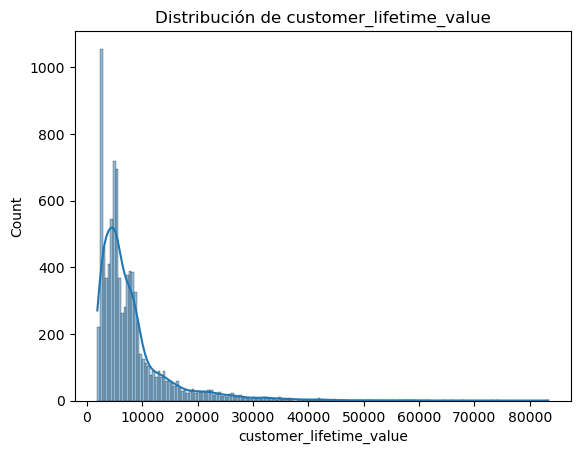

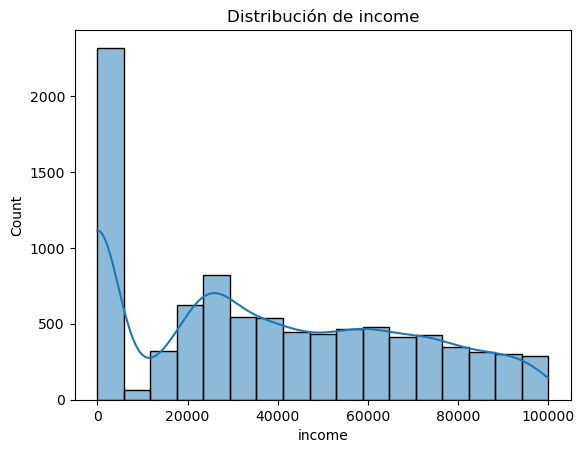

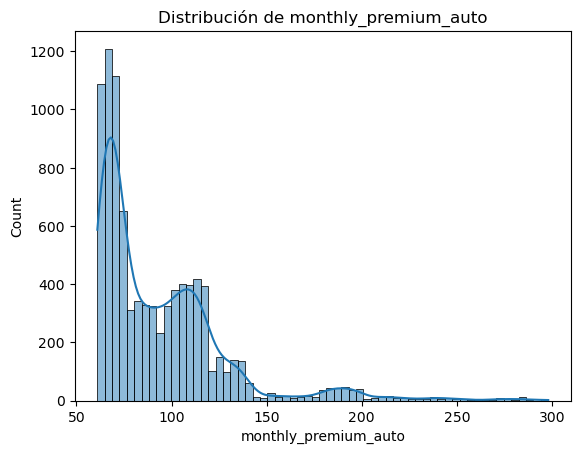

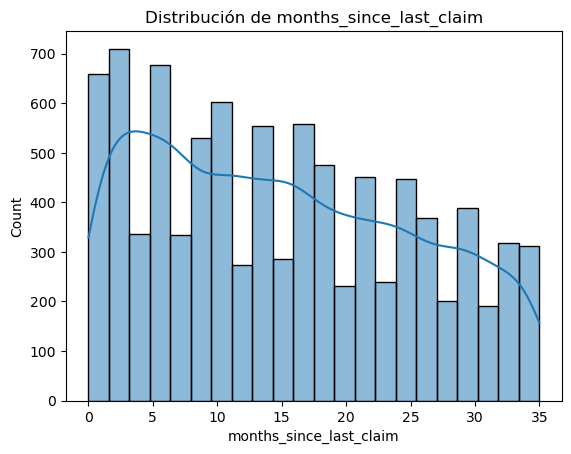

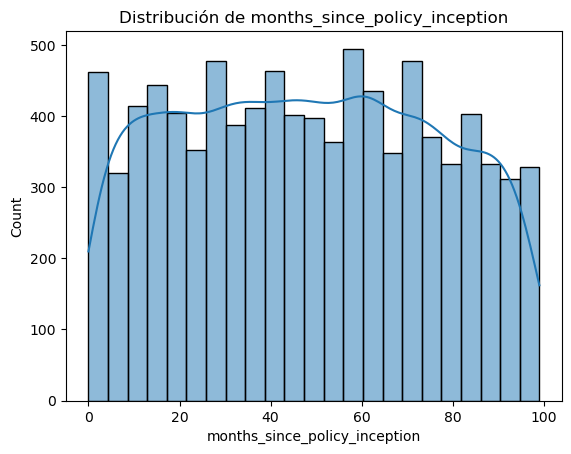

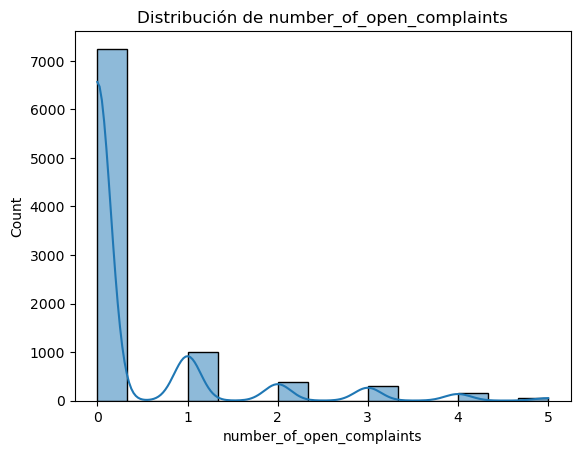

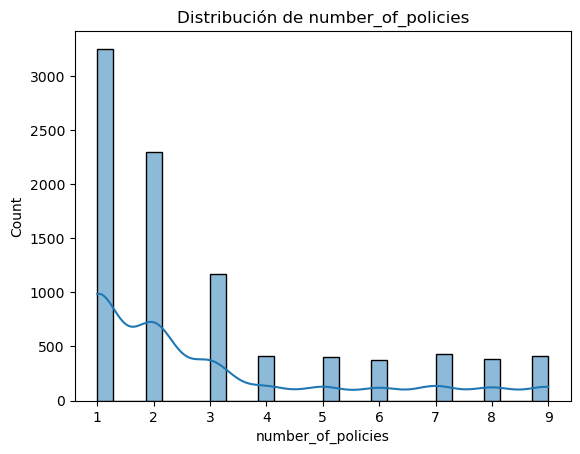

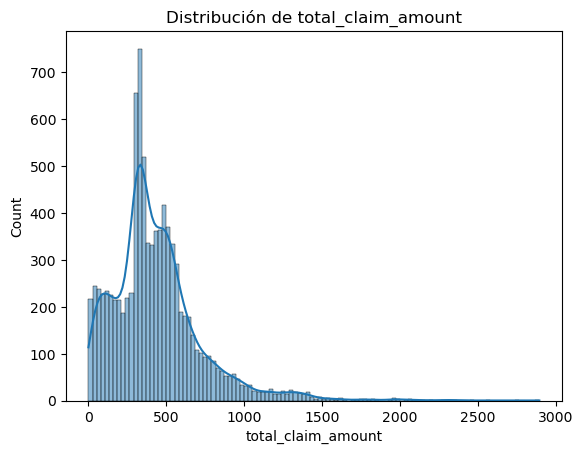

In [8]:
for columna in numericals.columns:
    sns.histplot(numericals[columna], kde=True)
    plt.title(f'Distribución de {columna}')
    plt.show()

### Check and deal with `null` values.

In [9]:
# Checking for null values, con una función.
nulls = pd.DataFrame(data.isna().sum()/len(data))
nulls= nulls.reset_index()
nulls.columns = ['column_name', 'Percentage Null Values']
nulls.sort_values(by='Percentage Null Values', ascending = False)

,column_name,Percentage Null Values
0,customer,0.0
1,state,0.0
22,vehicle_class,0.0
21,total_claim_amount,0.0
20,sales_channel,0.0
19,renew_offer_type,0.0
18,policy,0.0
17,policy_type,0.0
16,number_of_policies,0.0
15,number_of_open_complaints,0.0


nulos = numericos.isnull().sum()
print(nulos)Todo y que viendo la información que nos daba el data.info y ya veíamos que no había nulos, hemos chekeado con una función si era así. Vemos realmente que todas la variables no tienen nulos.

In [10]:
null = numericals.isnull().sum()
print(null)

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64


### Check and deal with outliers. (Probar con rango iq en 1,5, 3, 0.9)


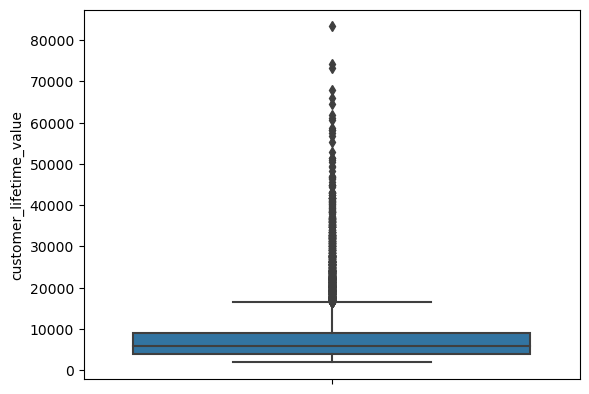

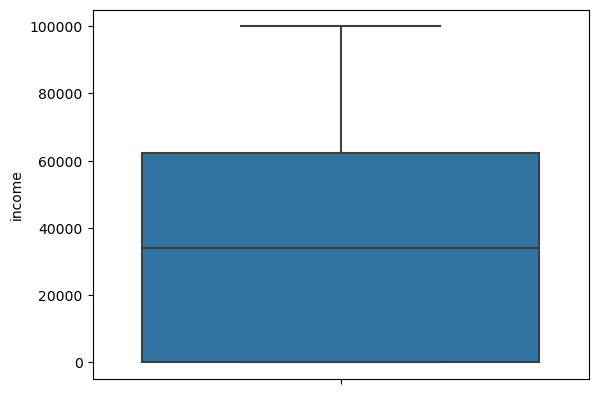

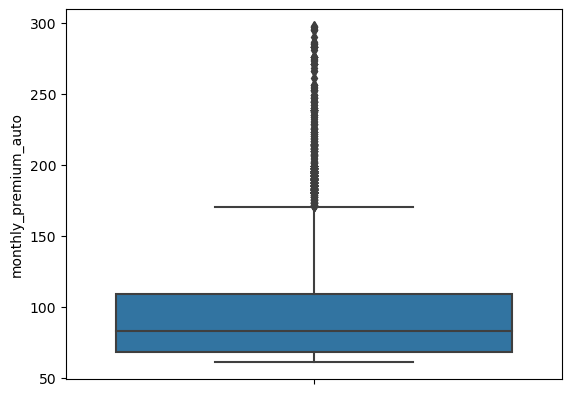

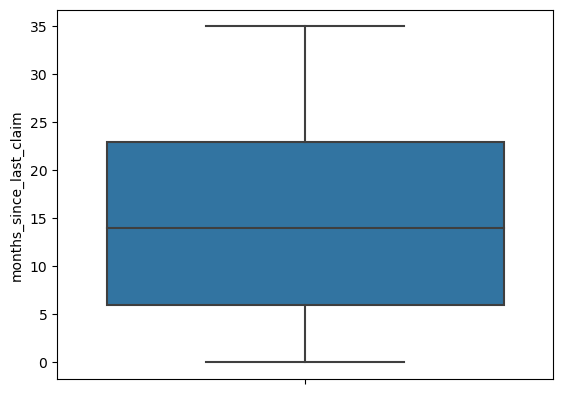

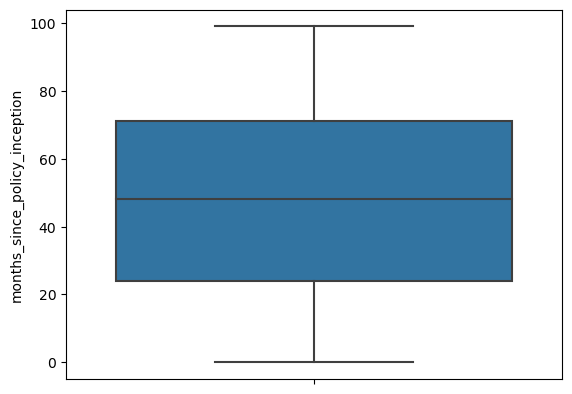

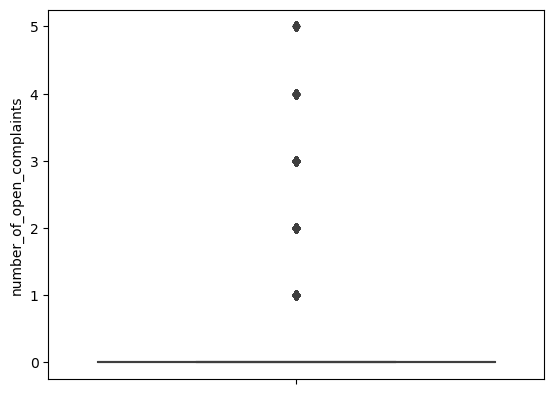

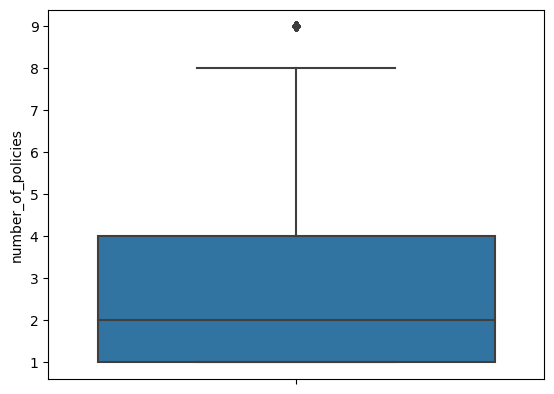

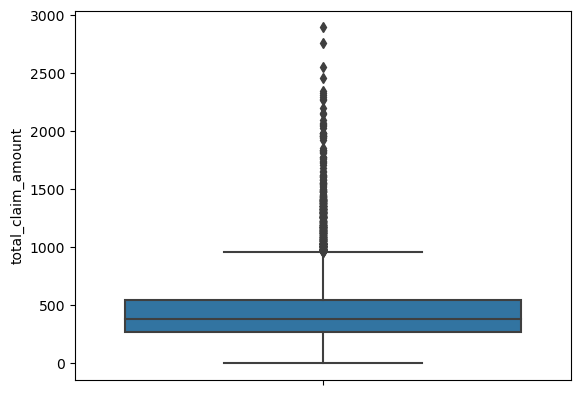

In [11]:
for columns in numericals.columns:
    sns.boxplot(y=numericals[columns])
    plt.show()

## Verifico y trato con valores atípicos (Probaré con rango IQR en 1.5, 3, 0.9)

In [13]:
def tratar_valores_atipicos(df, columna, coef=1.5):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - coef * IQR
    limite_superior = Q3 + coef * IQR
    df[columna] = np.where(df[columna] < limite_inferior, limite_inferior, df[columna])
    df[columna] = np.where(df[columna] > limite_superior, limite_superior, df[columna])

for coef in [1.5, 3, 0.9]:
    for columna in numericals.columns:
        tratar_valores_atipicos(numericals, columna, coef)

In [14]:
numericals

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274.0,69.0,32.0,5.0,0.0,1.0,384.811147
1,6979.535903,0.0,94.0,13.0,42.0,0.0,6.7,795.245774
2,12887.431650,48767.0,108.0,18.0,38.0,0.0,2.0,566.472247
3,7645.861827,0.0,106.0,18.0,65.0,0.0,6.7,529.881344
4,2813.692575,43836.0,73.0,12.0,44.0,0.0,1.0,138.130879
...,...,...,...,...,...,...,...,...
9129,13433.290764,71941.0,73.0,18.0,89.0,0.0,2.0,198.234764
9130,3096.511217,21604.0,79.0,14.0,28.0,0.0,1.0,379.200000
9131,8163.890428,0.0,85.0,9.0,37.0,0.0,2.0,790.784983
9132,7524.442436,21941.0,96.0,34.0,3.0,0.0,3.0,691.200000


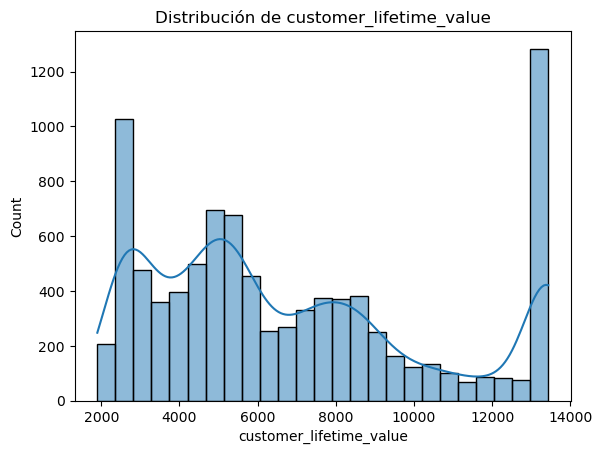

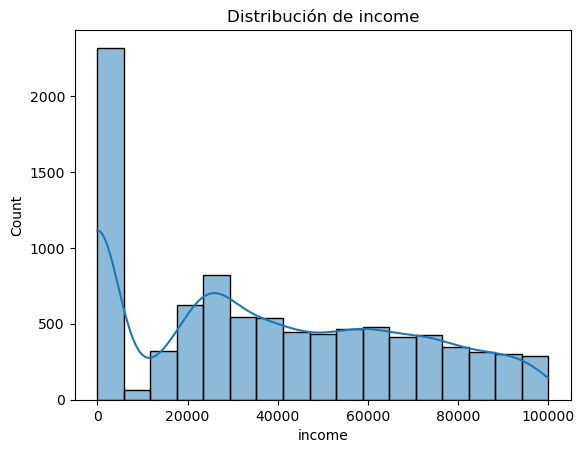

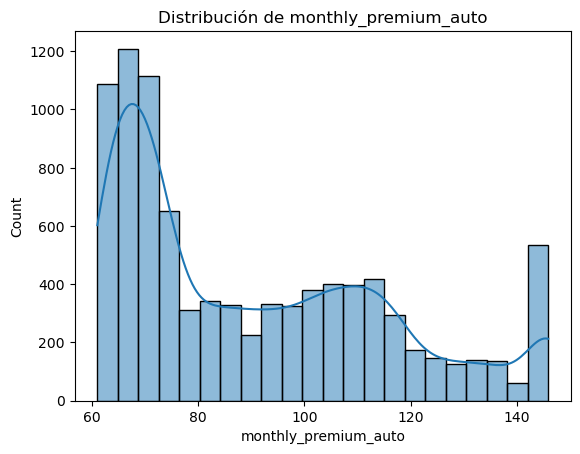

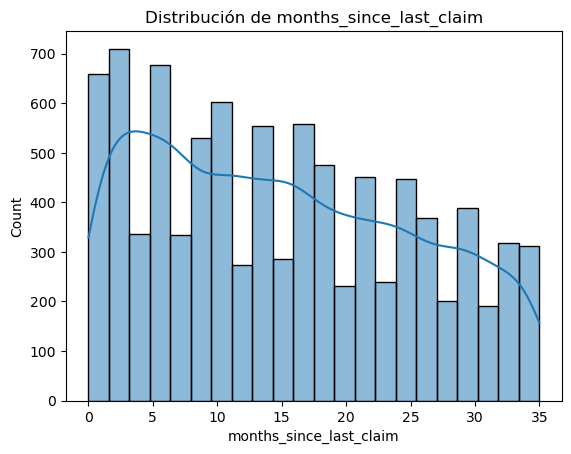

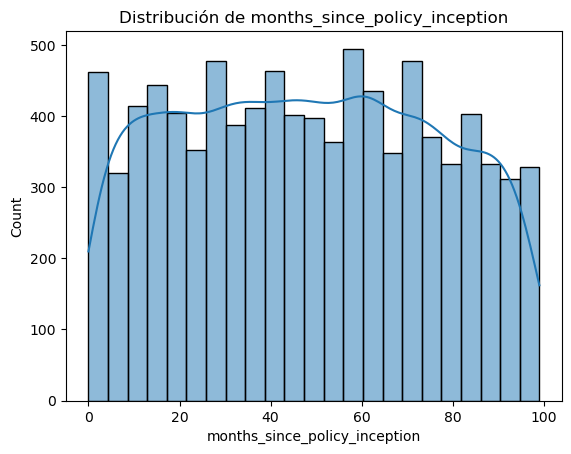

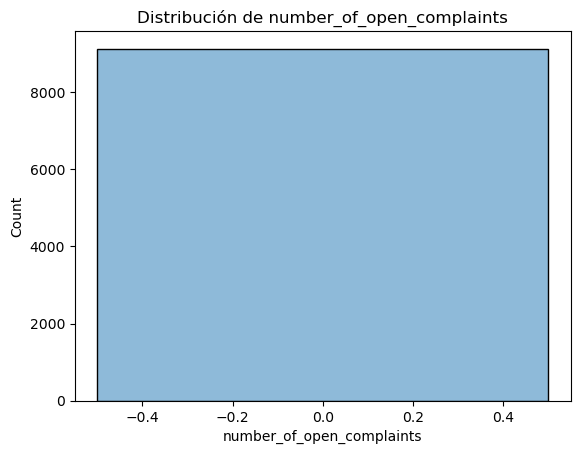

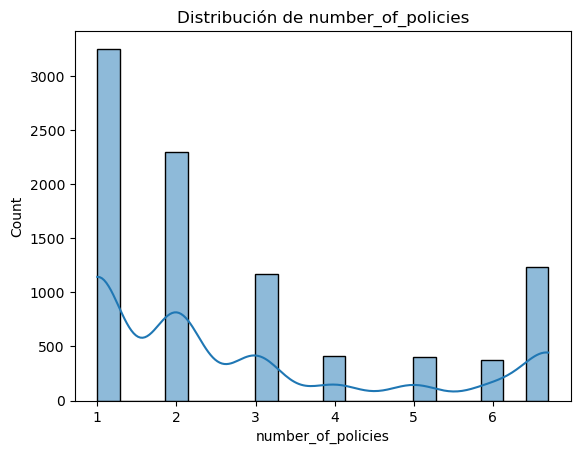

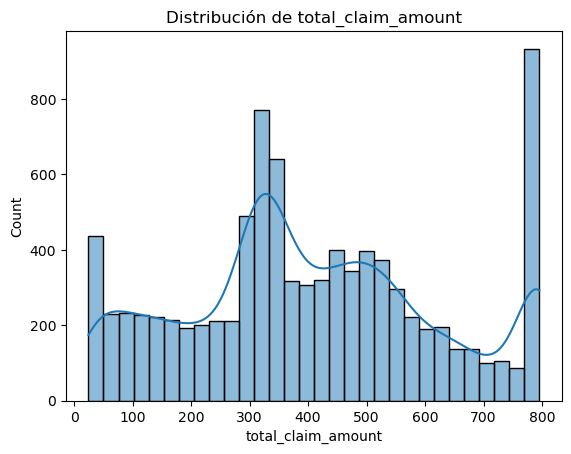

In [15]:
for columna in numericals.columns:
    sns.histplot(numericals[columna], kde=True)
    plt.title(f'Distribución de {columna}')
    plt.show()

## Normalizar la columnas

In [16]:
scaler = MinMaxScaler()
numericals_normalize = pd.DataFrame(scaler.fit_transform(numericals), columns=numericals.columns)

In [17]:
numericals_normalize

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0.075032,0.562847,0.094229,0.914286,0.050505,0.0,0.000000,0.467465
1,0.440520,0.000000,0.388693,0.371429,0.424242,0.0,1.000000,1.000000
2,0.952679,0.487763,0.553592,0.514286,0.383838,0.0,0.175439,0.703168
3,0.498285,0.000000,0.530035,0.514286,0.656566,0.0,1.000000,0.655692
4,0.079381,0.438443,0.141343,0.342857,0.444444,0.0,0.000000,0.147400
...,...,...,...,...,...,...,...,...
9129,1.000000,0.719547,0.141343,0.514286,0.898990,0.0,0.175439,0.225384
9130,0.103899,0.216081,0.212014,0.400000,0.282828,0.0,0.000000,0.460184
9131,0.543193,0.000000,0.282686,0.257143,0.373737,0.0,0.175439,0.994212
9132,0.487759,0.219452,0.412250,0.971429,0.030303,0.0,0.350877,0.865002


## Regresiones lineales

### Usando Statsmodel

In [18]:
# Preparo los datos
X = numericals_normalize.drop(columns=['customer_lifetime_value'])
y = numericals_normalize['customer_lifetime_value']

# Agrego la constante.
X_const = sm.add_constant(X)

# Ajusto del modelo.
modelo_sm = sm.OLS(y, X_const).fit()

# Printeo el resultado.
print(modelo_sm.summary())

                               OLS Regression Results                              
Dep. Variable:     customer_lifetime_value   R-squared:                       0.242
Model:                                 OLS   Adj. R-squared:                  0.242
Method:                      Least Squares   F-statistic:                     486.0
Date:                     Sat, 01 Jun 2024   Prob (F-statistic):               0.00
Time:                             00:08:28   Log-Likelihood:                -1041.7
No. Observations:                     9134   AIC:                             2097.
Df Residuals:                         9127   BIC:                             2147.
Df Model:                                6                                         
Covariance Type:                 nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

### Usando sklearn

In [19]:
# Divido los datos.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajusto del modelo.
modelo_sklearn = LinearRegression()
modelo_sklearn.fit(X_train, y_train)

# Hago la predicción.
y_pred = modelo_sklearn.predict(X_test)

# Evalúo el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}, R^2: {r2}')

MSE: 0.07340201638124827, R^2: 0.25286568616528826


### Interpretar resultados

- Modelo Statsmodels: el p-valor de 4 variables nos indica que sería interesante desacharlas del moledo, estas dos variables son 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints' y 'total_claim_amount ', ya que supera el valor de 0,1 que es el valor límite y el r2 es de 0,24, es un valor muy bajo.

- Modelo Sklearn: Tenemos un r2 pero de 0,25, lo que también no indica que es un modelo mejorable.

## Repito las regresiones lineales pero ahora estandarizado las columnas.

In [20]:
scaler_std = StandardScaler()
numericals_estandar = pd.DataFrame(scaler_std.fit_transform(numericals), columns=numericals.columns)

In [21]:
numericals_estandar

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,-1.141225,0.612827,-0.841320,1.678099,-1.543287,0.0,-0.888600,-0.102989
1,0.031978,-1.239617,0.150241,-0.208186,-0.217334,0.0,1.937003,1.789440
2,1.675985,0.365710,0.705515,0.288205,-0.360680,0.0,-0.392880,0.734613
3,0.217399,-1.239617,0.626190,0.288205,0.606907,0.0,1.937003,0.565900
4,-1.127263,0.203390,-0.682670,-0.307465,-0.145661,0.0,-0.888600,-1.240380
...,...,...,...,...,...,...,...,...
9129,1.827883,1.128558,-0.682670,0.288205,1.466984,0.0,-0.392880,-0.963254
9130,-1.048562,-0.528450,-0.444696,-0.108908,-0.719046,0.0,-0.888600,-0.128861
9131,0.361552,-1.239617,-0.206721,-0.605299,-0.396517,0.0,-0.392880,1.768873
9132,0.183611,-0.517356,0.229566,1.876656,-1.614960,0.0,0.102840,1.309707


### Usando Statsmodel

In [22]:
# Preparo de los datos.
X_std = numericals_estandar.drop(columns=['customer_lifetime_value'])
y_std = numericals_estandar['customer_lifetime_value']

# Agrego constante.
X_std_const = sm.add_constant(X_std)

# Ajusto del modelo.
modelo_sm_std = sm.OLS(y_std, X_std_const).fit()

# Printeo resultados.
print(modelo_sm_std.summary())

                               OLS Regression Results                              
Dep. Variable:     customer_lifetime_value   R-squared:                       0.242
Model:                                 OLS   Adj. R-squared:                  0.242
Method:                      Least Squares   F-statistic:                     486.0
Date:                     Sat, 01 Jun 2024   Prob (F-statistic):               0.00
Time:                             00:11:22   Log-Likelihood:                -11694.
No. Observations:                     9134   AIC:                         2.340e+04
Df Residuals:                         9127   BIC:                         2.345e+04
Df Model:                                6                                         
Covariance Type:                 nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

### Usando sklearn

In [23]:
# Divido los datos.
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_std, y_std, test_size=0.2, random_state=42)

# Ajusto del modelo.
modelo_sklearn_std = LinearRegression()
modelo_sklearn_std.fit(X_train_std, y_train_std)

# Hago la predicción.
y_pred_std = modelo_sklearn_std.predict(X_test_std)

# Evalúo el modelo.
mse_std = mean_squared_error(y_test_std, y_pred_std)
r2_std = r2_score(y_test_std, y_pred_std)
print(f'MSE: {mse_std}, R^2: {r2_std}')

MSE: 0.7563209634084754, R^2: 0.25286568616528826


### Interpretar resultados

- Modelo Statsmodels: el p-valor de 4 variables nos indica que sería interesante desacharlas del moledo, estas dos variables son 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints' y 'total_claim_amount ', ya que supera el valor de 0,1 que es el valor límite y el R² es de 0,24, es un valor muy bajo.

- Modelo Sklearn: Tenemos un R² pero de 0,25, lo que también no indica que es un modelo mejorable.

Estoy obteniendo los mismos resultados con los dos procesos, no estoy seguro si tiene que ser así. Lo que si es cierto que nuestro modelo no ha mejorado respecto el pasado laboratio que teníamos un r2 de 0,52.

### Lo que voy a probar es a quitar las features que nos daban un Pvalor que no nos interesaba y volver a repetir los modelos a ver que pasa.

## Regresiones lineales con features normalizadas.

### Statsmodels

In [31]:
# Preparo los datos
X = numericals_normalize.drop(columns=['customer_lifetime_value', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'total_claim_amount'])
y = numericals_normalize['customer_lifetime_value']

# Agrego la constante.
X_const = sm.add_constant(X)

# Ajusto del modelo.
modelo_sm = sm.OLS(y, X_const).fit()

# Printeo el resultado.
print(modelo_sm.summary())

                               OLS Regression Results                              
Dep. Variable:     customer_lifetime_value   R-squared:                       0.242
Model:                                 OLS   Adj. R-squared:                  0.242
Method:                      Least Squares   F-statistic:                     971.3
Date:                     Sat, 01 Jun 2024   Prob (F-statistic):               0.00
Time:                             00:22:13   Log-Likelihood:                -1043.0
No. Observations:                     9134   AIC:                             2094.
Df Residuals:                         9130   BIC:                             2123.
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

#### No nos ha afectado a nuestro modelo!!

### Sklearn

In [32]:
# Divido los datos.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajusto del modelo.
modelo_sklearn = LinearRegression()
modelo_sklearn.fit(X_train, y_train)

# Hago la predicción.
y_pred = modelo_sklearn.predict(X_test)

# Evalúo el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}, R^2: {r2}')

MSE: 0.07342740344970725, R^2: 0.2526072797766292


#### No nos ha afectado a nuestro modelo!!

## Regresiones lineales con features estandarizadas.

### Statsmodels

In [34]:
# Preparo de los datos.
X_std = numericals_estandar.drop(columns=['customer_lifetime_value', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'total_claim_amount'])
y_std = numericals_estandar['customer_lifetime_value']

# Agrego constante.
X_std_const = sm.add_constant(X_std)

# Ajusto del modelo.
modelo_sm_std = sm.OLS(y_std, X_std_const).fit()

# Printeo resultados.
print(modelo_sm_std.summary())

                               OLS Regression Results                              
Dep. Variable:     customer_lifetime_value   R-squared:                       0.242
Model:                                 OLS   Adj. R-squared:                  0.242
Method:                      Least Squares   F-statistic:                     971.3
Date:                     Sat, 01 Jun 2024   Prob (F-statistic):               0.00
Time:                             00:24:11   Log-Likelihood:                -11696.
No. Observations:                     9134   AIC:                         2.340e+04
Df Residuals:                         9130   BIC:                         2.343e+04
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

#### Seguimos igual.

### Sklearn

In [35]:
# Divido los datos.
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_std, y_std, test_size=0.2, random_state=42)

# Ajusto del modelo.
modelo_sklearn_std = LinearRegression()
modelo_sklearn_std.fit(X_train_std, y_train_std)

# Hago la predicción.
y_pred_std = modelo_sklearn_std.predict(X_test_std)

# Evalúo el modelo.
mse_std = mean_squared_error(y_test_std, y_pred_std)
r2_std = r2_score(y_test_std, y_pred_std)
print(f'MSE: {mse_std}, R^2: {r2_std}')

MSE: 0.7565825471226788, R^2: 0.252607279776629


#### No hemos tenido ninguna mejora tampoco.